# Agregaciones: mínima, máxima y todo lo demás

Un primer paso para explorar cualquier conjunto de datos suele ser calcular varias estadísticas resumidas.
Quizás las estadísticas de resumen más comunes son la media y la desviación estándar, que le permiten resumir los valores "típicos" en un conjunto de datos, pero también son útiles otras agregaciones (la suma, el producto, la mediana, el mínimo y el máximo, los cuantiles, etc.). ).

NumPy tiene funciones de agregación rápidas integradas para trabajar en matrices; Discutiremos y probaremos algunos de ellos aquí.

## Sumar los valores en una matriz

Como ejemplo rápido, considere calcular la suma de todos los valores en una matriz.
El propio Python puede hacer esto usando la función incorporada `suma`:

In [1]:
import numpy as np
rng = np.random.default_rng()

In [2]:
L = rng.random(100)
sum(L)

52.76825337322368

La sintaxis es bastante similar a la de la función `suma` de NumPy, y el resultado es el mismo en el caso más simple:

In [3]:
np.sum(L)

52.76825337322366

Sin embargo, debido a que ejecuta la operación en código compilado, la versión de la operación de NumPy se calcula mucho más rápidamente:

In [4]:
big_array = rng.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

89.9 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
521 µs ± 8.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Pero tenga cuidado: la función `sum` y la función `np.sum` no son idénticas, lo que a veces puede generar confusión.
En particular, sus argumentos opcionales tienen significados diferentes (`sum(x, 1)` inicializa la suma en `1`, mientras que `np.sum(x, 1)` suma a lo largo del eje `1`), y `np.sum ` reconoce múltiples dimensiones de matriz, como veremos en la siguiente sección.

## Mínimo y Máximo

De manera similar, Python tiene funciones `min` y `max` integradas, que se utilizan para encontrar el valor mínimo y el valor máximo de cualquier matriz determinada:

In [5]:
min(big_array), max(big_array)

(2.0114398036064074e-07, 0.9999997912802653)

Las funciones correspondientes de NumPy tienen una sintaxis similar y nuevamente operan mucho más rápidamente:

In [6]:
np.min(big_array), np.max(big_array)

(2.0114398036064074e-07, 0.9999997912802653)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

72 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
564 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Para `min`, `max`, `sum` y varios otros agregados de NumPy, una sintaxis más corta es usar métodos del propio objeto de matriz:

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

2.0114398036064074e-07 0.9999997912802653 499854.0273321711


Siempre que sea posible, asegúrese de utilizar la versión NumPy de estos agregados cuando opere en matrices NumPy.

### Agregados multidimensionales

Un tipo común de operación de agregación es una agregación a lo largo de una fila o columna.
Digamos que tiene algunos datos almacenados en una matriz bidimensional:

In [9]:
M = rng.integers(0, 10, (3, 4))
print(M)

[[0 3 1 2]
 [1 9 7 0]
 [4 8 3 7]]


Las agregaciones NumPy se aplicarán en todos los elementos de una matriz multidimensional:

In [10]:
M.sum()

45

Las funciones de agregación toman un argumento adicional que especifica el *eje* a lo largo del cual se calcula el agregado. Por ejemplo, podemos encontrar el valor mínimo dentro de cada columna especificando `eje=0`:

In [11]:
M.min(axis=0)

array([0, 3, 1, 0])

La función devuelve cuatro valores, correspondientes a las cuatro columnas de números.

De manera similar, podemos encontrar el valor máximo dentro de cada fila:

In [12]:
M.max(axis=1)

array([3, 9, 8])

La forma en que se especifica el eje aquí puede resultar confusa para los usuarios de otros idiomas.
La palabra clave `axis` especifica la dimensión de la matriz que se *contraerá*, en lugar de la dimensión que se devolverá.
Entonces, especificar `axis=0` significa que el eje 0 se contraerá: para matrices bidimensionales, los valores dentro de cada columna se agregarán.

### Otras funciones de agregación

NumPy proporciona varias otras funciones de agregación con una API similar y, además, la mayoría tiene una contraparte segura `NaN` que calcula el resultado ignorando los valores faltantes, que están marcados por el valor especial `NaN` de punto flotante IEEE (consulte [Manejo de funciones faltantes). Datos](03.04-Valores-perdidos.ipynb)).

La siguiente tabla proporciona una lista de funciones de agregación útiles disponibles en NumPy:

|Nombre de la función |   Versión segura para NaN| Descripción |
|-----------------|-------------------|----------- ------------------------------------|
| `np.suma` | `np.nansum` | Calcular la suma de elementos |
| `np.prod` | `np.nanprod` | Calcular producto de elementos |
| `np.media` | `np.nanmean` | Calcular la media de los elementos |
| `np.std` | `np.nanstd` | Calcular la desviación estándar |
| `np.var` | `np.nanvar` | Calcular la varianza |
| `np.min` | `np.nanmin` | Encuentra el valor mínimo |
| `np.max` | `np.nanmax` | Encuentra el valor máximo |
| `np.argmin` | `np.nanargmin` | Encontrar índice de valor mínimo |
| `np.argmax` | `np.nanargmax` | Encontrar índice de valor máximo |
| `np.mediana` | `np.nanmediana` | Calcular la mediana de los elementos |
| `np.percentil` | `np.nanpercentil`| Calcular estadísticas de elementos basadas en rangos |
| `np.cualquier` | N/A | Evaluar si algún elemento es verdadero |
| `np.todos` | N/A | Evaluar si todos los elementos son verdaderos |

Verá estos agregados con frecuencia a lo largo del resto del libro.

## Ejemplo: ¿Cuál es la altura promedio de los presidentes de Estados Unidos?

Los agregados disponibles en NumPy pueden actuar como estadísticas resumidas para un conjunto de valores.
Como pequeño ejemplo, consideremos las alturas de todos los presidentes de Estados Unidos.
Estos datos están disponibles en el archivo *president_heights.csv*, que es una lista de etiquetas y valores separados por comas:

In [13]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


Usaremos el paquete Pandas, que exploraremos más a fondo en la [Parte 3](03.00-Introducción-a-Pandas.ipynb), para leer el archivo y extraer esta información (tenga en cuenta que las alturas se miden en centímetros) :

In [14]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


Ahora que tenemos esta matriz de datos, podemos calcular una variedad de estadísticas resumidas:

In [15]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


Tenga en cuenta que en cada caso, la operación de agregación redujo toda la matriz a un único valor de resumen, lo que nos brinda información sobre la distribución de valores.
También es posible que deseemos calcular cuantiles:

In [16]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.75
Median:             182.0
75th percentile:    183.5


Vemos que la altura media de los presidentes estadounidenses es de 182 cm, o apenas seis pies.

Por supuesto, a veces es más útil ver una representación visual de estos datos, lo cual podemos lograr usando herramientas en Matplotlib (analizaremos Matplotlib con más detalle en la [Parte 4] (04.00-Introducción-a-Matplotlib.ipynb)). Por ejemplo, este código genera el siguiente gráfico:

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

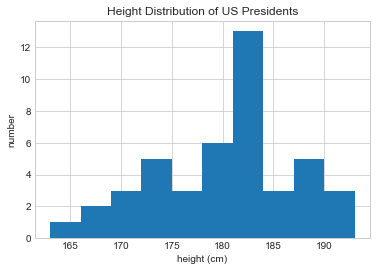

In [18]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');